In [2]:
import sys, os
sys.path.append("/Users/alighafouri/Desktop/gits/gliomas_old_obs/src/")
sys.path.append("/Users/alighafouri/Desktop/gits/gliomas_old_obs/")
from imports import *
from tools import *
from vis import *
from adjoint_obs import *
from forward import *
from grad_obs import *
from hess_obs import *
from optimizer_obs import *

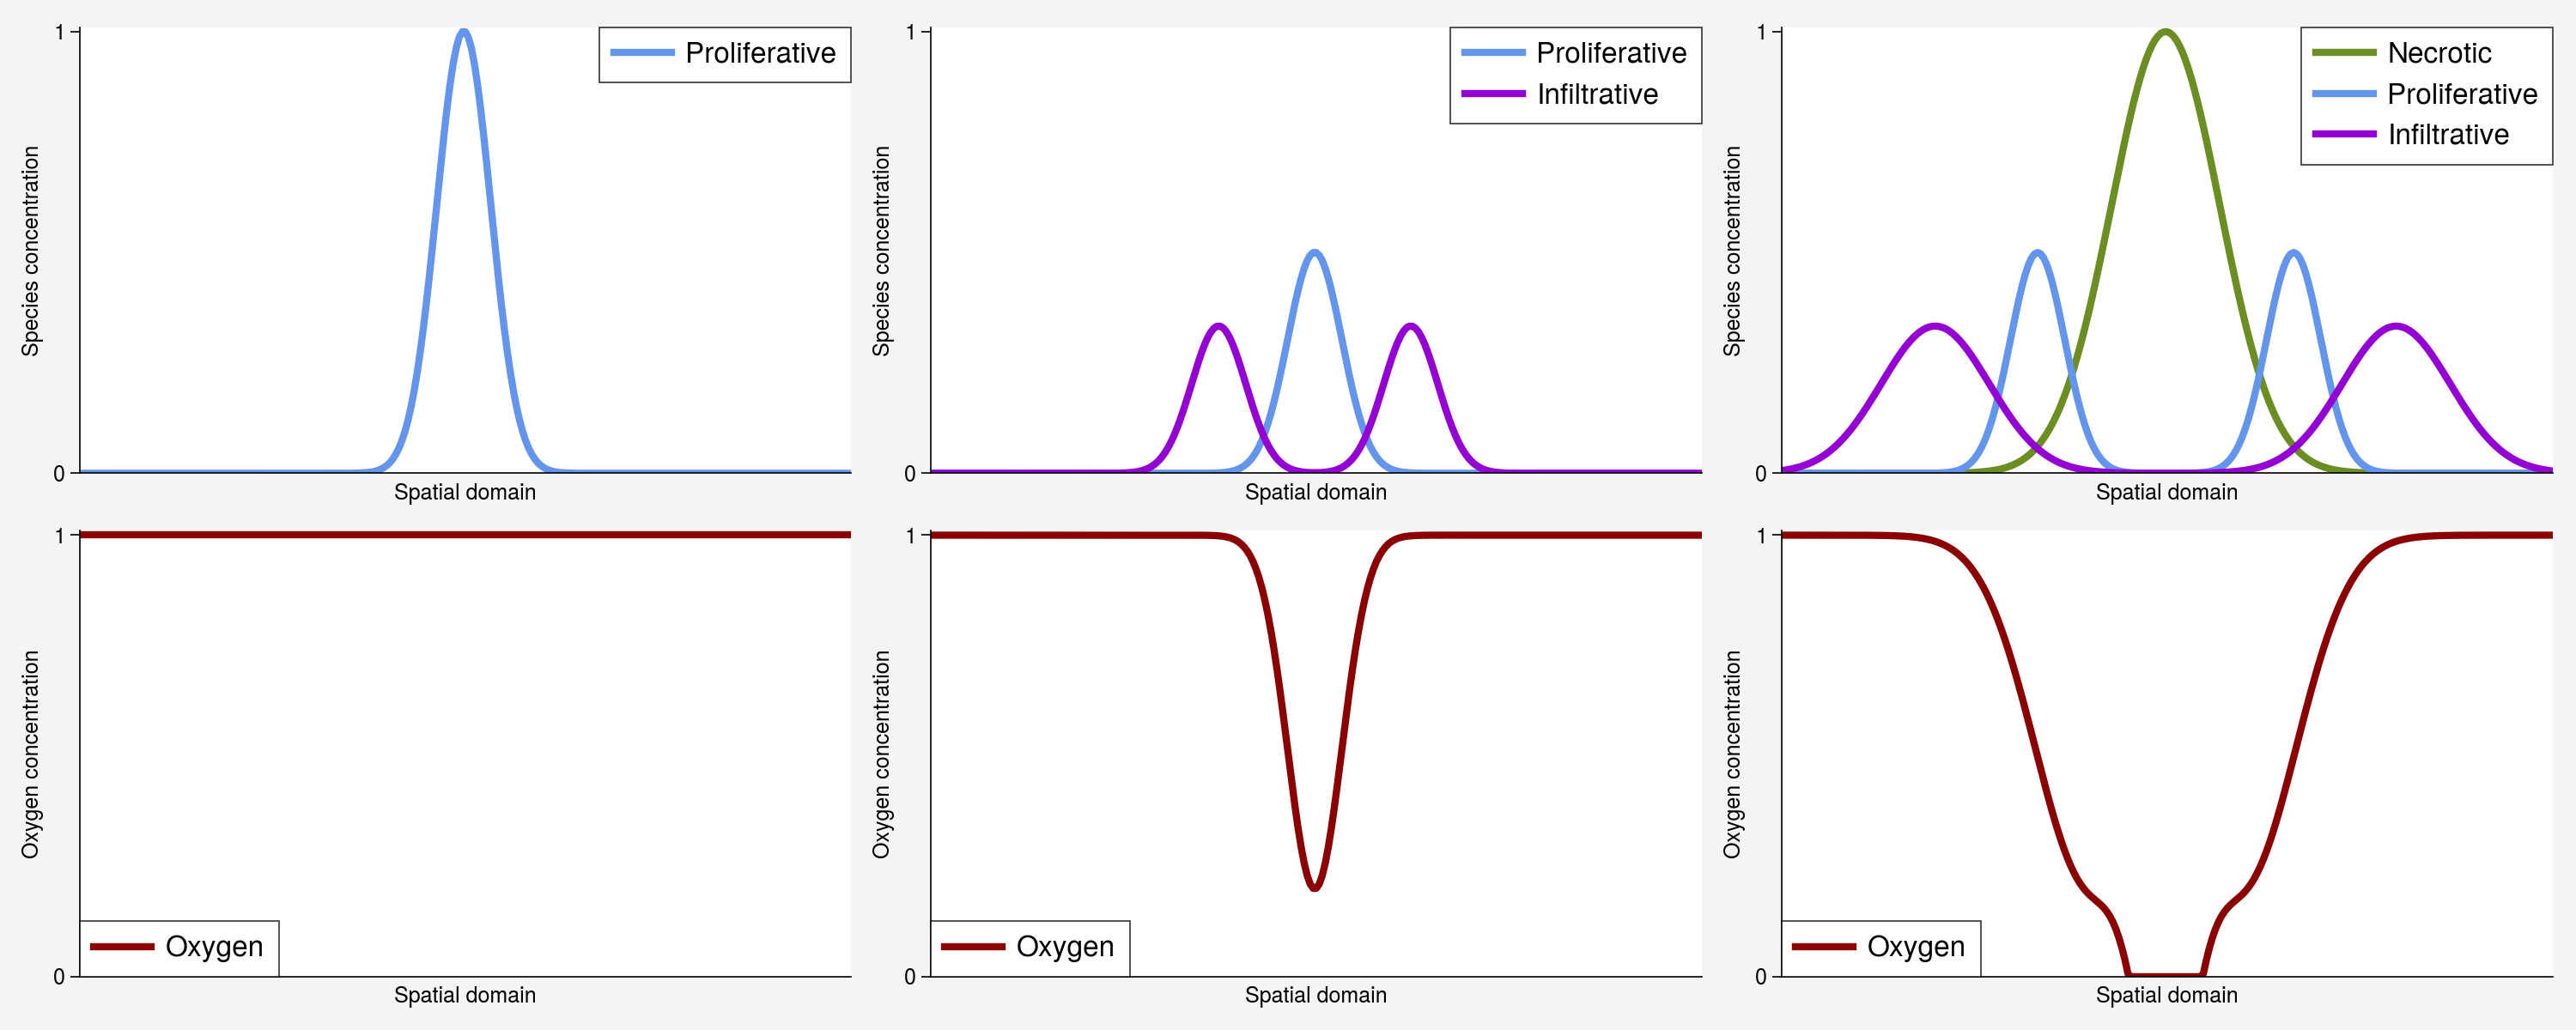

In [3]:
def run_case():


    params = {}
    params['nx'] = int(256)
    params['nt'] = int(50)

    params['sigma'] = 2 * np.pi / params['nx']
    params['sigma_smooth'] = 2 * np.pi / params['nx']

    #params['lmbd_1'] = 0.0
    #params['sigma'] = 1


    list_params = ['k', 'rho', 'beta', 'alpha', 'gamma', 'delta_c', 'delta_s', 'ox_hyp', 'ox_inv', 'i_th']


    params['HS_nx'] = 32
    params['HS_ed'] = 256
    params['HS_seg'] = 32
    params['eps'] = 1e-8


    # changes

    params['output'] = 'sc1'

    params['T'] = 1.0
    params['save_figs'] = False
    params['save_figure_adj'] = False
    params['save_video'] = False
    params['time_history'] = True

    params['title'] = 'adjoint solver'

    nx = params['nx']

    x = np.linspace(0, 2*np.pi, params['nx'])

    p_0_centers = [(128, 1.0)]
    p0_vec = np.zeros(nx)
    wm0_vec = np.ones(nx)
    sigma = params['sigma']
    for q in range(len(p_0_centers)):
        mean = 2*np.pi* p_0_centers[q][0] / nx
        tmp = p_0_centers[q][1] * np.exp(-(x - mean)**2/(2*sigma**2))
        tmp[p_0_centers[q][0]+2:] = 0
        tmp[:p_0_centers[q][0]-2] = 0
        p0_vec += tmp

        p0_vec /= np.max(p0_vec)
        wm0_vec = 1-p0_vec


    params['p0'] = p0_vec

    noise_list = [0.07, 0.15, 0.27, 0.42]
    true_vec = [6.0000e-02, 1.9000e+01, 8.0000e+00, 2.0000e+00, 1.0000e+01, 
                1.3000e+01, 3.0000e+00, 3.0000e-01, 5.0000e-01, 3.0000e-02]
    
    for i,p in enumerate(list_params):
        params[p] = true_vec[i]
    init_params = params.copy()
    params['T'] = 1.0
    
    
    x = np.linspace(0, 2*np.pi, 256)
    y = np.exp(-0.5*(x-np.pi)**2/(2*np.pi/128))
    y /= np.amax(y)
    
    fig = plt.figure(figsize=(15, 6)) 
    
    ax1 = plt.subplot2grid((2, 3), loc=(0,0))
    ax2 = plt.subplot2grid((2, 3), loc=(0,1))
    ax3 = plt.subplot2grid((2, 3), loc=(0,2))
    ax4 = plt.subplot2grid((2, 3), loc=(1,0))
    ax5 = plt.subplot2grid((2, 3), loc=(1,1))
    ax6 = plt.subplot2grid((2, 3), loc=(1,2))    

    
    
    
    p_color = 'cornflowerblue'
    i_color = 'darkviolet'
    n_color = 'olivedrab'
    o_color = 'darkred'
    
    lw = 3.0
    
    
    ax1.plot(y, color = p_color, linewidth=lw, label='Proliferative')
    ax4.plot(np.ones_like(p0_vec), color = o_color, linewidth=lw, label='Oxygen')
    
    ax1.set_ylim(0, 1.01)
    ax2.set_ylim(0, 1.01)
    ax3.set_ylim(0, 1.01)


    ax1.set_xlim(0, 256)
    ax2.set_xlim(0, 256)
    ax3.set_xlim(0, 256)
    
    ax4.set_ylim(0, 1.01)
    ax5.set_ylim(0, 1.01)
    ax6.set_ylim(0, 1.01)


    ax4.set_xlim(0, 256)
    ax5.set_xlim(0, 256)
    ax6.set_xlim(0, 256)    
 
    
    o = 1-0.8*y    
    y1 = np.exp(-0.5*(x-np.pi)**2/(2*np.pi/128))
    y1 /= 2*np.amax(y1)
    y2 = np.exp(-0.5*(x-3*np.pi/4)**2/(2*np.pi/128)) + np.exp(-0.5*(x-5*np.pi/4)**2/(2*np.pi/128))
    y2 /= 3*np.amax(y2)
    
    ax2.plot(y1, color = p_color, linewidth=lw, label='Proliferative')
    ax2.plot(y2, color = i_color, linewidth=lw, label='Infiltrative')    
    ax5.plot(o, color = o_color, linewidth=lw, label='Oxygen')
    
    tmp = np.exp(-0.5*(x-4*np.pi/5)**2/(2*np.pi/32)) + np.exp(-0.5*(x-6*np.pi/5)**2/(2*np.pi/32))
    tmp /= np.amax(tmp)
    o -= 0.8*tmp
    o[o < 0] = 0
    y1 = np.exp(-0.5*(x-np.pi)**2/(2*np.pi/32))
    y1 /= np.amax(y1)
    y2 = np.exp(-0.5*(x-2*np.pi/3)**2/(2*np.pi/128)) + np.exp(-0.5*(x-4*np.pi/3)**2/(2*np.pi/128))
    y2 /= 2*np.amax(y2)
    y3 = np.exp(-0.5*(x-2*np.pi/5)**2/(2*np.pi/32)) + np.exp(-0.5*(x-8*np.pi/5)**2/(2*np.pi/32))
    y3 /= 3*np.amax(y3)
    
    ax3.plot(y1, color = n_color, linewidth=lw, label='Necrotic')
    ax3.plot(y2, color = p_color, linewidth=lw, label='Proliferative')
    ax3.plot(y3, color = i_color, linewidth=lw, label='Infiltrative')
    
    ax6.plot(o, color = o_color, linewidth=lw, label='Oxygen')
    
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.grid(False)
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.grid(False)
    ax3.spines[['right', 'top']].set_visible(False)
    ax3.grid(False)
    
    ax4.spines[['right', 'top']].set_visible(False)
    ax4.grid(False)
    ax5.spines[['right', 'top']].set_visible(False)
    ax5.grid(False)
    ax6.spines[['right', 'top']].set_visible(False)
    ax6.grid(False)    

    ax1.set_xlabel('Spatial domain')
    ax1.set_ylabel('Species concentration')
    
    ax3.set_xlabel('Spatial domain')
    ax3.set_ylabel('Species concentration')
    ax2.set_xlabel('Spatial domain')
    ax2.set_ylabel('Species concentration')    
    
    
    ax4.set_xlabel('Spatial domain')
    ax4.set_ylabel('Oxygen concentration')
    ax5.set_xlabel('Spatial domain')
    ax5.set_ylabel('Oxygen concentration')
    ax6.set_xlabel('Spatial domain')
    ax6.set_ylabel('Oxygen concentration')    

      
    
    
    
    ax1.tick_params(labelbottom = False, bottom = False)
    ax1.minorticks_off()
    
    ax2.tick_params(labelbottom = False, bottom = False)
    ax2.minorticks_off()    
    
    ax3.tick_params(labelbottom = False, bottom = False)
    ax3.minorticks_off()    
    
 

    ax1.set_yticks([0, 1.0])
    ax2.set_yticks([0, 1.0])
    ax3.set_yticks([0, 1.0])
    
    ax4.tick_params(labelbottom = False, bottom = False)
    ax4.minorticks_off()
    
    ax5.tick_params(labelbottom = False, bottom = False)
    ax5.minorticks_off()    
    
    ax6.tick_params(labelbottom = False, bottom = False)
    ax6.minorticks_off()    
    
 

    ax4.set_yticks([0, 1.0])
    ax5.set_yticks([0, 1.0])
    ax6.set_yticks([0, 1.0])    
   
    
    
    
    fs = 12
    ax1.legend(fontsize=fs)
    ax2.legend(fontsize=fs)
    ax3.legend(fontsize=fs)
    ax4.legend(fontsize=fs)
    ax5.legend(fontsize=fs)
    ax6.legend(fontsize=fs)    


    fig.tight_layout()
    plt.savefig("Schem_config.pdf", format='pdf', dpi=1028)
    
    plt.show()
    


    
    




if __name__ == "__main__":
    run_case()




